In [1]:
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder 
from sklearn.model_selection import KFold , cross_val_score , cross_val_predict 
from sklearn.metrics import precision_score , recall_score , f1_score , confusion_matrix
from sklearn.metrics import precision_recall_curve , PrecisionRecallDisplay 
from sklearn.metrics import roc_curve , RocCurveDisplay , roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import math
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#IMPORTING DATA
df = pd.read_csv("data.csv" , index_col = 0)
df.head(10)


,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0
6,105,8,1,34.0,0,1,14,31,19,12,3,1,0,0
7,13,8,1,37.0,1,0,14,31,19,12,3,1,6,0
8,13,8,1,39.0,1,0,14,31,19,12,3,1,5,0
9,13,8,1,56.0,1,0,14,31,19,12,3,1,4,0


In [3]:
nLocation = pd.cut(df.location, bins=5 , labels=np.arange(5), right=False)
df['location'] = nLocation

nCountry = pd.cut(df.country, bins=5 , labels=np.arange(5), right=False)
df['country'] = nCountry

nAge = pd.cut(df.age, bins=5, labels=np.arange(5), right=False)
df['age'] = nAge

df.head(5)


,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,3,1,1,3,1,0,14,31,19,12,3,1,8,1
1,3,1,0,2,0,1,14,31,19,12,3,1,0,0
2,4,1,1,2,0,1,14,31,19,12,3,1,13,0
3,4,1,0,3,1,0,14,31,19,12,3,1,0,0
4,4,1,1,2,0,0,14,31,19,12,3,1,0,0


In [4]:
label_encoder = LabelEncoder()
df['location'] = label_encoder.fit_transform(df['location'])
encoder = OneHotEncoder(sparse=False)
df[['loc0','loc1', 'loc2' , 'loc3' , 'loc4'   ]] = encoder.fit_transform(df['location'].values.reshape(-1,1))

label_encoderC = LabelEncoder()
df['country'] = label_encoderC.fit_transform(df['country'])
encoderC = OneHotEncoder(sparse=False)
df[['Coun0','Coun1', 'Coun2' , 'Coun3' , 'Coun4' ]] = encoderC.fit_transform(df['country'].values.reshape(-1,1))

label_encoderG = LabelEncoder()
df['gender'] = label_encoderG.fit_transform(df['gender'])
encoderG = OneHotEncoder(sparse=False)
df[['Man','Woman', 'Other']] = encoderG.fit_transform(df['gender'].values.reshape(-1,1))

df = df.drop("location", axis=1)
df = df.drop("country", axis=1)
df = df.drop("gender", axis=1)
df.head(10)


,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,...,loc3,loc4,Coun0,Coun1,Coun2,Coun3,Coun4,Man,Woman,Other
0,3,1,0,14,31,19,12,3,1,8,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0,1,14,31,19,12,3,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,0,1,14,31,19,12,3,1,13,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,1,0,14,31,19,12,3,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,0,0,14,31,19,12,3,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,2,0,1,14,31,19,12,3,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1,0,1,14,31,19,12,3,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1,1,0,14,31,19,12,3,1,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1,1,0,14,31,19,12,3,1,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,2,1,0,14,31,19,12,3,1,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
#Reordering the columns
df = df[['age', 'vis_wuhan', 'from_wuhan' , 'symptom1' , 'symptom2' , 'symptom3' , 'symptom4' , 'symptom5' , 'symptom6' , 'diff_sym_hos' ,'loc0','loc1', 'loc2' , 'loc3' , 'loc4' , 'Coun0','Coun1', 'Coun2' , 'Coun3' , 'Coun4' ,'Man','Woman' ,'Other' , 'result']]
X = df.iloc[:,0:23].values
Y = df.iloc[:, 23:24].values

scaler = MinMaxScaler(feature_range=(0, 1))
nX = scaler.fit_transform(X)
nY = scaler.fit_transform(Y)


In [6]:
k_range = range(1,21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, nX, nY.ravel(), cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    
for i in range(20):
    print(k_scores[i] , "\n")
    

0.8529372227449926 

0.8761191020298427 

0.838977013039387 

0.8713671192364565 

0.8609557736254873 

0.8760653313617421 

0.8737330286328806 

0.8795335394542276 

0.8574539588654388 

0.8528162387417664 

0.8562844468342521 

0.8562911681677644 

0.8586033068960882 

0.8748689339965049 

0.878343863422503 

0.8771945153918537 

0.8771945153918537 

0.8760317246941793 

0.8771945153918537 

0.8771743513913162 



In [7]:
print('Optimum K accuracy: ', max(k_scores))

Optimum K accuracy:  0.8795335394542276


Text(0, 0.5, 'Accuracy')

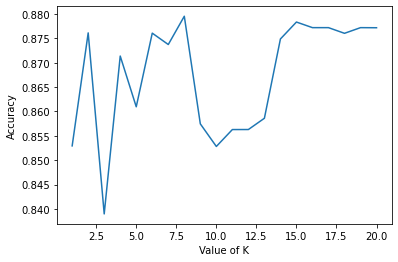

In [8]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

In [9]:
knn = KNeighborsClassifier(n_neighbors=17)
scores = cross_val_score(knn, nX, nY.ravel(), cv=5, scoring='accuracy')
print(scores)

KNN_Average = scores.mean()
print(scores.mean())

[0.86127168 0.88439306 0.86705202 0.88372093 0.88953488]
0.8771945153918537


In [10]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(nX,nY.ravel())
y_train_pred = cross_val_predict(knn,nX,nY.ravel(), cv = 5)


In [11]:
Precision_KNN = precision_score(nY, y_train_pred)
Confusion_Matrix_KNN = confusion_matrix(nY, y_train_pred)
print(Confusion_Matrix_KNN , "\n")
print(Precision_KNN , "\n")
Recall_KNN = recall_score(nY, y_train_pred)
print(Recall_KNN , "\n")
F1_KNN = f1_score(nY,y_train_pred)
print(F1_KNN , "\n")

[[748   7]
 [ 99   9]] 

0.5625 

0.08333333333333333 

0.14516129032258063 



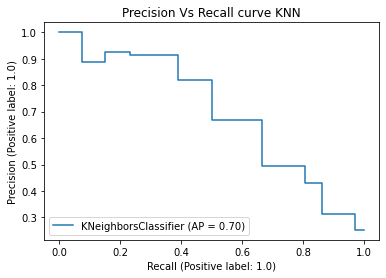

In [12]:
y_scores = cross_val_predict(knn,nX,nY.ravel(), cv=5)
precisions, recalls, thresholds = precision_recall_curve(nY, y_scores)
display = PrecisionRecallDisplay.from_estimator(knn,nX,nY)
_ = display.ax_.set_title("Precision Vs Recall curve KNN")

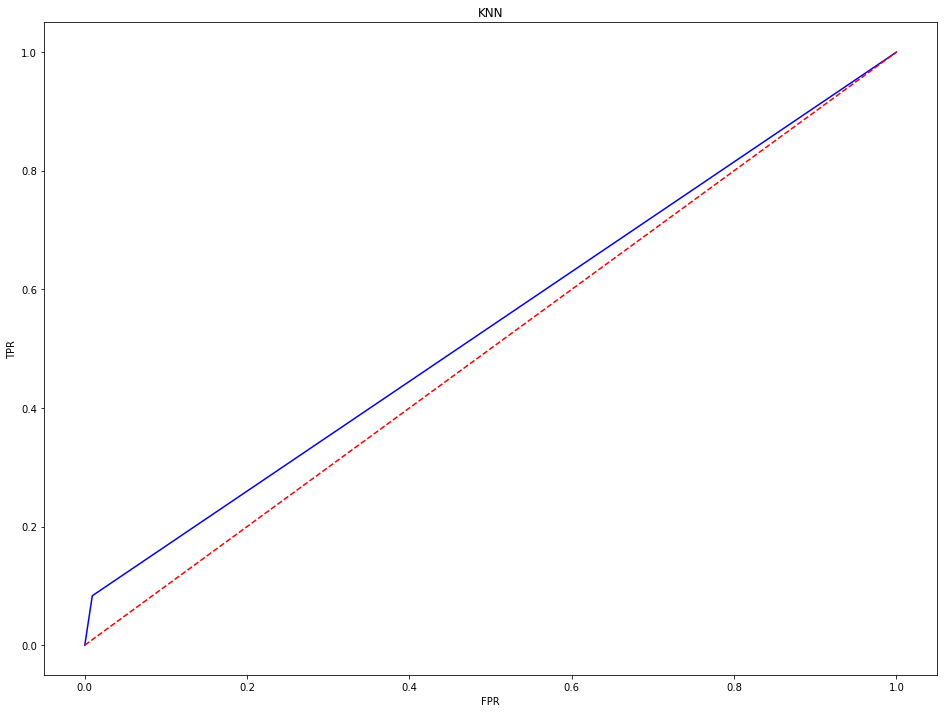

In [13]:
fpr, tpr, threshold = roc_curve(nY, y_scores)
plt.figure(figsize = (16,12))
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.title("KNN")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [14]:
print(precisions)
print(recalls)
print(thresholds)

AUC_KNN = roc_auc_score(nY, y_scores)
print(AUC_KNN , "\n")


[0.12514484 0.5625     1.        ]
[1.         0.08333333 0.        ]
[0. 1.]
0.5370309050772626 



In [15]:
# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
log_clf = LogisticRegression()


In [18]:
param_grid = [    
    {'penalty' : ['l2', 'none'],
    'C' : [100, 0.1, 0.01],
    'solver' : ['newton-cg', 'lbfgs'],
    'max_iter' : [100, 1000,2500, 5000,10000]
    }
]

In [20]:
from sklearn.model_selection  import GridSearchCV
grid = GridSearchCV(log_clf, param_grid = param_grid, cv = 4, verbose=True, n_jobs=-1)
best = grid.fit(nX,nY.ravel())

Fitting 4 folds for each of 60 candidates, totalling 240 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [22]:
best.best_estimator_

LogisticRegression(C=100, penalty='none', solver='newton-cg')

In [23]:
scores_Log = cross_val_score(best.best_estimator_, nX, nY.ravel(), cv=5, scoring='accuracy')
Log_Average = scores_Log.mean()
print(scores_Log)

[0.95953757 0.89017341 0.86705202 0.97674419 0.95348837]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will igno

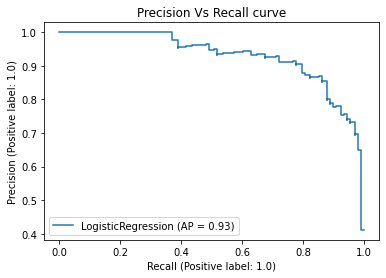

In [24]:
best.best_estimator_.fit(nX,nY.ravel())
y_train_log = cross_val_predict(best.best_estimator_,nX,nY.ravel(), cv = 5)
precisions_log, recalls_log, thresholds_log = precision_recall_curve(nY, y_train_log)
display = PrecisionRecallDisplay.from_estimator(best.best_estimator_,nX,nY)
_ = display.ax_.set_title("Precision Vs Recall curve")

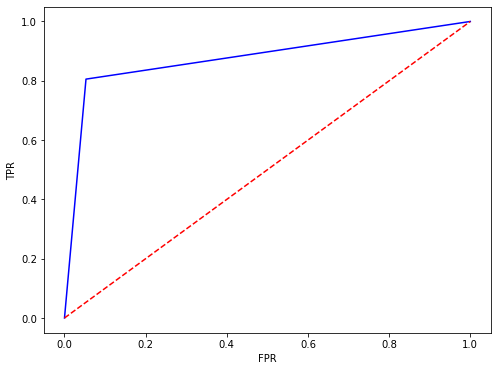

In [26]:
fpr_log, tpr_log, threshold_log = roc_curve(nY, y_train_log)
plt.figure(figsize = (8,6))
plt.plot(fpr_log, tpr_log, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [27]:
AUC_log = roc_auc_score(nY, y_train_log)
print(AUC_log)
print(precisions_log)
print(recalls_log)
print(thresholds_log)

0.8762877115526121
[0.12514484 0.68503937 1.        ]
[1.         0.80555556 0.        ]
[0. 1.]


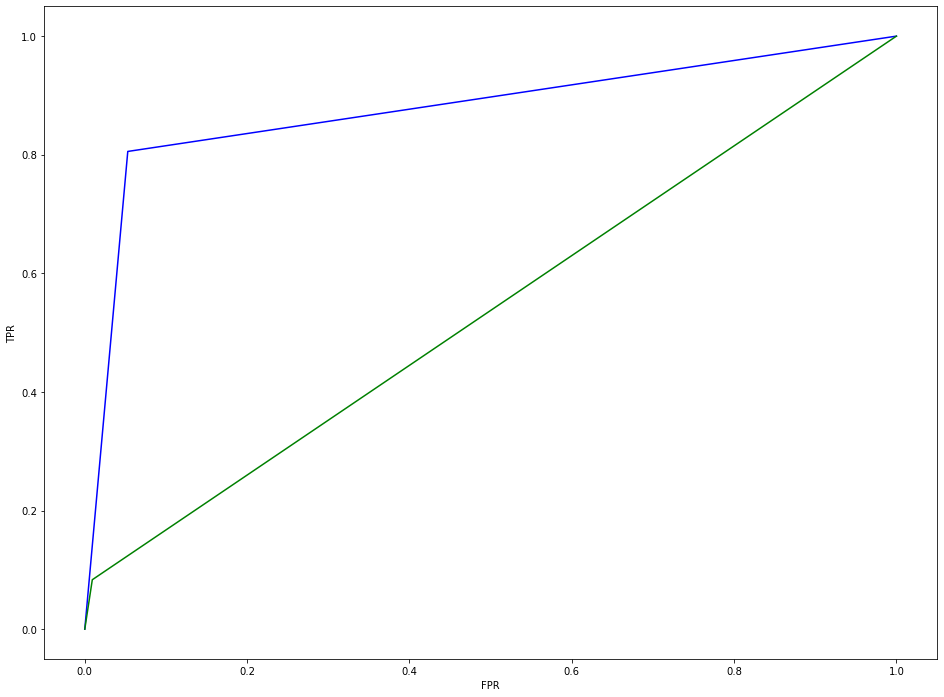

In [28]:
plt.figure(figsize = (16,12))
plt.plot(fpr_log, tpr_log, 'b')
plt.plot(fpr, tpr, 'g')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [29]:
print("Area Under the Curve for logistic Regression Classifier is: " , AUC_log)
print("Area Under the Curve for KNN classifier is                : " , AUC_KNN)

Area Under the Curve for logistic Regression Classifier is:  0.8762877115526121
Area Under the Curve for KNN classifier is                :  0.5370309050772626


# NAIVE BAYES CLASSIFIER

In [32]:
NB = GaussianNB()
params_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_NB = GridSearchCV(estimator=NB, param_grid=params_gnb, cv=5, verbose=1,scoring='accuracy') 
grid_NB.fit(nX, nY.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [34]:
scores_NB = cross_val_score(grid_NB.best_estimator_, X, Y.ravel(), cv=5, scoring='accuracy')
NB_Average = scores_NB.mean()
scores_NB
print(scores_NB.mean())
  

0.8748622126629924


In [35]:
print("KNN Average of the folds is                : ", KNN_Average)
print("Logistic Regression Average of the folds is: " ,Log_Average)
print("Naive Bayes classifier Average of the folds is: " , NB_Average)  

KNN Average of the folds is                :  0.8771945153918537
Logistic Regression Average of the folds is:  0.9293991127839764
Naive Bayes classifier Average of the folds is:  0.8748622126629924


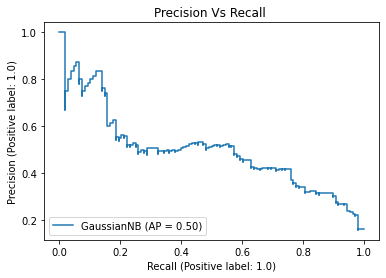

In [36]:
grid_NB.best_estimator_.fit(nX,nY.ravel())
y_train_naive = cross_val_predict(grid_NB.best_estimator_,nX,nY.ravel(), cv = 5)
precisions_nb, recalls_nb, thresholds_nb = precision_recall_curve(Y, y_train_naive)
display = PrecisionRecallDisplay.from_estimator(grid_NB.best_estimator_,nX,nY)
_ = display.ax_.set_title("Precision Vs Recall ")

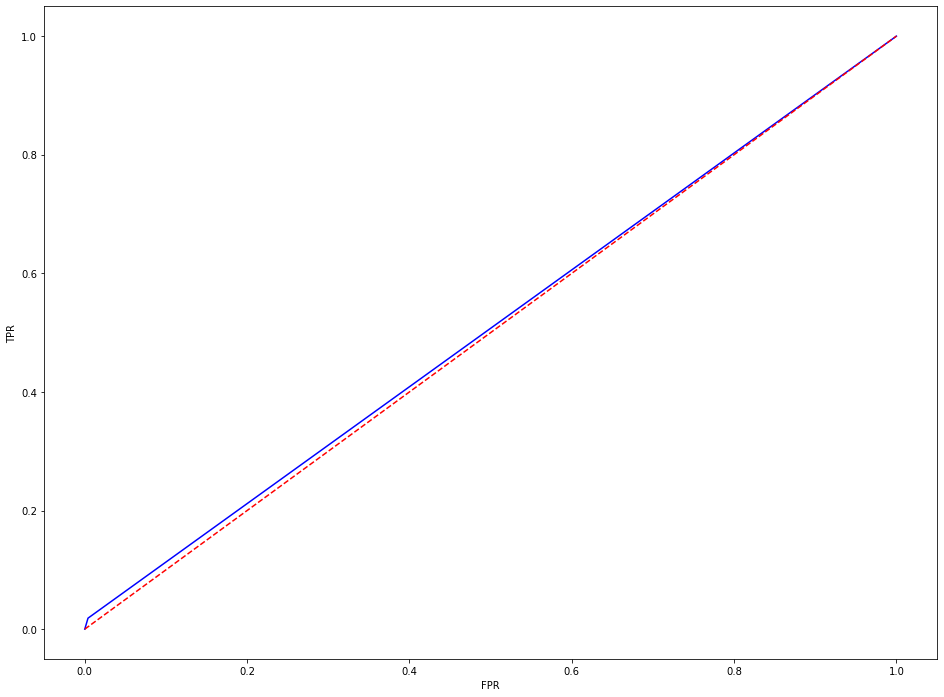

In [38]:
fpr_nb, tpr_nb, threshold_nb = roc_curve(nY, y_train_naive)
plt.figure(figsize = (16,12))
plt.plot(fpr_nb, tpr_nb, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [39]:
AUC_nb = roc_auc_score(nY, y_train_naive)
print(AUC_nb)
print(precisions_nb)
print(recalls_nb)
print(thresholds_nb)

0.5072725042923718
[0.12514484 0.4        1.        ]
[1.         0.01851852 0.        ]
[0. 1.]


# DECISION TREES

In [42]:
DTclf = DecisionTreeClassifier()
DTclf.fit(nX,nY.ravel())

DecisionTreeClassifier()

In [43]:
param_dt = {
    "criterion":['gini', 'entropy'],
    "max_depth":range(1,8),
    "min_samples_split":range(2,5),
    "min_samples_leaf":range(1,7)
}

In [44]:
gridDT=GridSearchCV(DTclf ,param_grid=param_dt,cv=5,verbose=1,n_jobs=-1)
gridDT.fit(nX,nY.ravel())

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 8),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 5)},
             verbose=1)

In [45]:
gridDT.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2)

In [46]:
gridDT.best_estimator_.fit(nX,nY.ravel())
scores_Tree = cross_val_score(gridDT.best_estimator_, nX, nY.ravel(), cv=7, scoring='accuracy')
Tree_Average = scores_Tree.mean()
scores_Tree   

array([0.93548387, 0.89516129, 0.8699187 , 0.91869919, 0.97560976,
       0.95121951, 0.80487805])

In [47]:
print("Average of the folds is:" , Tree_Average)  

Average of the folds is: 0.9072814806489078


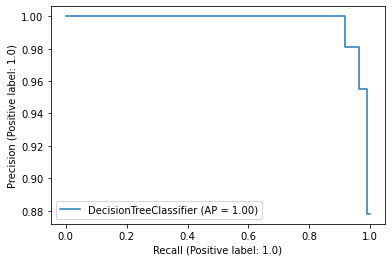

In [48]:
y_train_Tree = cross_val_predict(gridDT.best_estimator_,nX,nY.ravel(), cv = 7)
precisions_Tree, recalls_Tree, thresholds_Tree = precision_recall_curve(nY, y_train_Tree)
display = PrecisionRecallDisplay.from_estimator(DTclf,nX,nY)

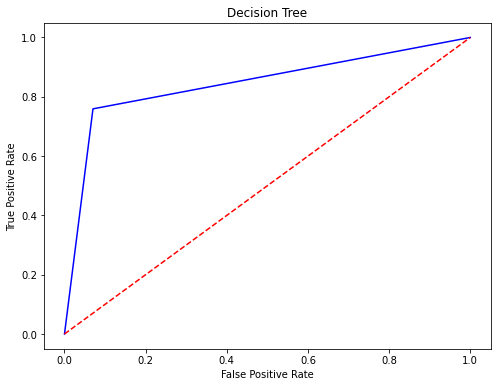

In [49]:
fpr_Tree, tpr_Tree, threshold_Tree = roc_curve(nY, y_train_Tree)
plt.figure(figsize = (8,6))
plt.plot(fpr_Tree, tpr_Tree, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.title("Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.show()

In [50]:
AUC_Tree = roc_auc_score(nY, y_train_Tree)
print("Area Under the Curve is: " , AUC_Tree)

Area Under the Curve is:  0.8445302918812853


In [52]:
print(precisions_Tree)
print(recalls_Tree)
print(thresholds_Tree)

[0.12514484 0.60740741 1.        ]
[1.         0.75925926 0.        ]
[0. 1.]


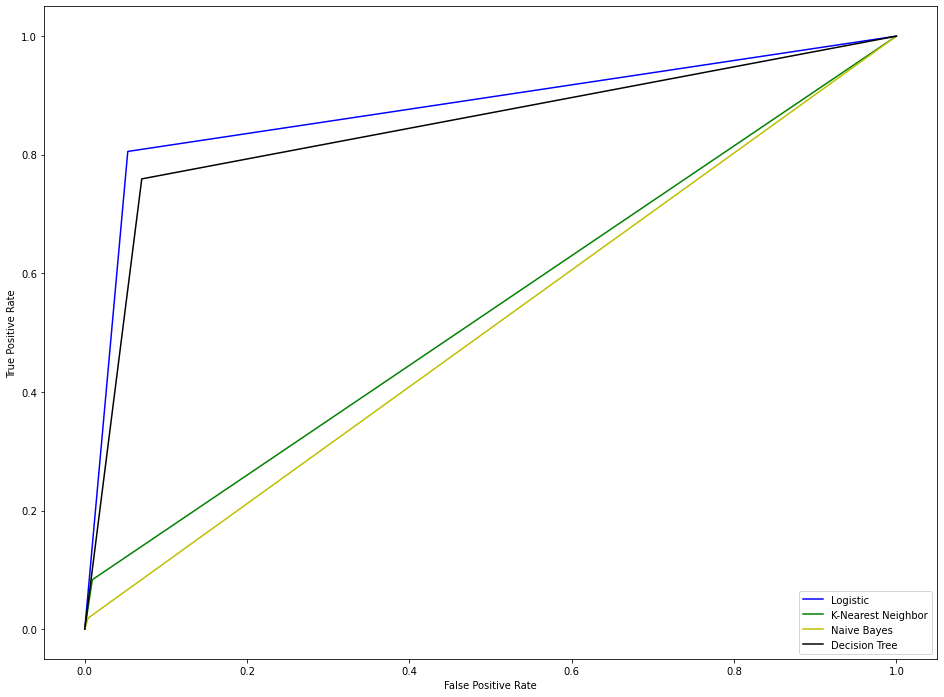

In [53]:
plt.figure(figsize = (16,12))
plt.plot(fpr_log, tpr_log, 'b')
plt.plot(fpr, tpr, 'g')
plt.plot(fpr_nb, tpr_nb, 'y')
plt.plot(fpr_Tree, tpr_Tree, 'black')
plt.legend(["Logistic", "K-Nearest Neighbor" ,"Naive Bayes" ,"Decision Tree" ], loc ="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
# SVM

In [55]:
SVM = svm.SVC(kernel='linear') 
svm_params = {'C': [0.1, 1, 10, 100],
              'gamma': [1,0.1,0.01, 0.001, 0.0001],
              'kernel':['rbf', 'poly']}

In [57]:
svm_g = GridSearchCV(SVM, svm_params, refit = True, verbose = 3, cv =5)
svm_g .fit(nX, nY.ravel())

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.878 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.878 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.948 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.867 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.925 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.948 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.948 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.942 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.959 total time=   0.0s
[CV 1/5] END ........C=10, gamma=1, kernel=poly;, score=0.942 total time=   0.0s
[CV 2/5] END ........C=10, gamma=1, kernel=poly;, score=0.838 total time=   0.0s
[CV 3/5] END ........C=10, gamma=1, kernel=poly;, score=0.931 total time=   0.0s
[CV 4/5] END ........C=10, gamma=1, kernel=poly;, score=0.948 total time=   0.0s
[CV 5/5] END ........C=10, gamma=1, kernel=poly;, score=0.948 total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.884 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.936 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.948 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 1/5] END ......C=10, gam

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [58]:
svm_g.best_estimator_

SVC(C=1, gamma=1, kernel='poly')

In [59]:
scores_SVM = cross_val_score(svm_g.best_estimator_, nX, nY.ravel(), cv=5, scoring='accuracy')
scores_SVM

array([0.95375723, 0.84393064, 0.93641618, 0.95348837, 0.94767442])

In [60]:
scores_SVM.mean()

0.9270533673880899

In [64]:
svm_g.best_estimator_.fit(nX,nY.ravel())

SVC(C=1, gamma=1, kernel='poly')

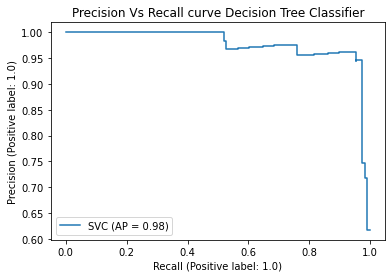

In [66]:
y_train_SVM = cross_val_predict(svm_g.best_estimator_,nX,nY.ravel(), cv = 7)
precisions_SVM, recalls_SVM, thresholds_SVM = precision_recall_curve(nY, y_train_SVM)
display = PrecisionRecallDisplay.from_estimator(svm_g.best_estimator_.fit(nX,nY.ravel()),nX,nY)
_ = display.ax_.set_title("Precision Vs Recall curve Decision Tree Classifier")

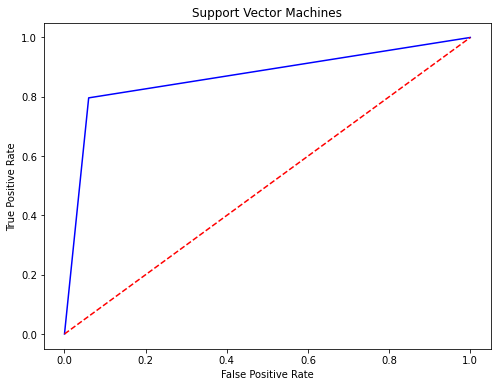

In [68]:
fpr_SVM, tpr_SVM, threshold_SVM = roc_curve(nY, y_train_SVM)
plt.figure(figsize = (8,6))
plt.plot(fpr_SVM, tpr_SVM, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.title("Support Vector Machines")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.show()

In [69]:
AUC_SVM = roc_auc_score(nY, y_train_SVM)
print("AUC =  " , AUC_SVM)
print(precisions_SVM)
print(recalls_SVM)
print(thresholds_SVM)

AUC =   0.8683468236448368
[0.12514484 0.65648855 1.        ]
[1.        0.7962963 0.       ]
[0. 1.]


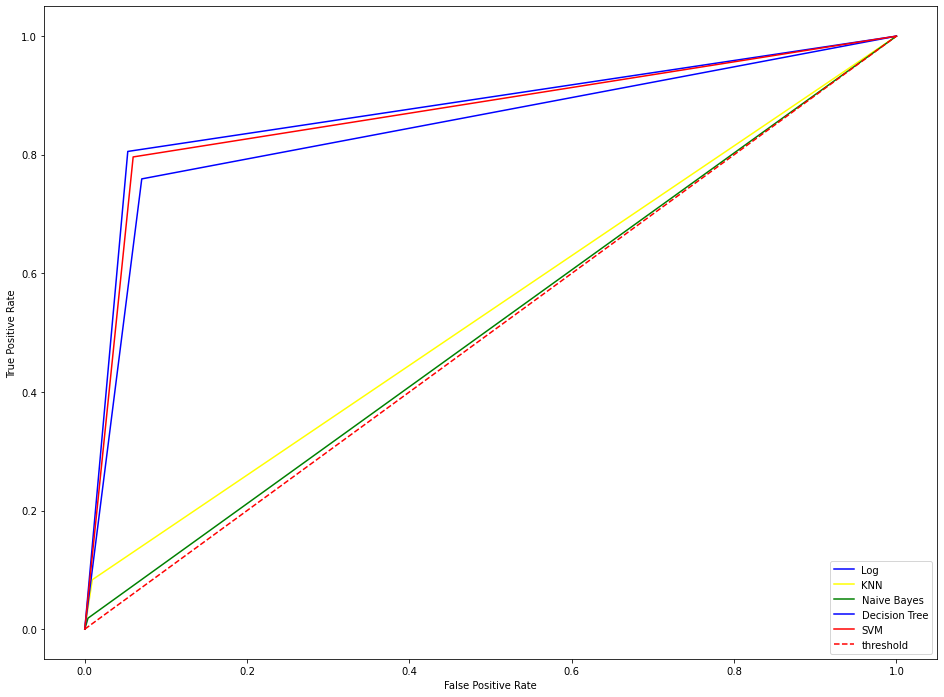

In [70]:
plt.figure(figsize = (16,12))
plt.plot(fpr_log, tpr_log, 'b')
plt.plot(fpr, tpr, 'yellow')
plt.plot(fpr_nb, tpr_nb, 'green')
plt.plot(fpr_Tree, tpr_Tree, 'blue')
plt.plot(fpr_SVM, tpr_SVM, 'red')
plt.plot([0, 1], [0, 1],'r--')
plt.legend(["Log", "KNN" ,"Naive Bayes" ,"Decision Tree" ,"SVM" ,"threshold"], loc ="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [72]:
print("AUC Logistic = " , AUC_log)
print("AUC KNN = " , AUC_KNN)
print("AUC NB = " , AUC_nb)
print("AUC DT = " , AUC_Tree)
print("AUC SVM = " , AUC_SVM)


AUC Logistic =  0.8762877115526121
AUC KNN =  0.5370309050772626
AUC NB =  0.5072725042923718
AUC DT =  0.8445302918812853
AUC SVM =  0.8683468236448368
